## Cartopy

Cartopy é um pacote Python que auxilia na criação de mapas, usando o matplotlib, para análises e visualização de dados geoespaciais.

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.PlateCarree())
c = ax.coastlines()

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()

kw = dict(linewidth=4, color='g', transform=ccrs.Geodetic())
l0 = plt.plot([-100, 50], [25, 25], label='Geodetic1', **kw)
l1 = plt.plot([-38, 147], [-13, -42], label='Geodetic1', **kw)

kw = dict(linewidth=4, color='b', transform=ccrs.PlateCarree())
l2 = plt.plot([-100, 50], [25, 25], label='PlateCarree1', **kw)
l3 = plt.plot([-38, 147], [-13, -42], label='PlateCarree2', **kw)

leg = ax.legend(loc=(1.05, 0.5))

In [ ]:
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines()

gl = ax.gridlines(draw_labels=True)

In [ ]:
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LATITUDE_FORMATTER

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
gl = ax.gridlines(draw_labels=True)

gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.yformatter = LATITUDE_FORMATTER

In [ ]:
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature


kw = dict(color='#FF9900', linestyle='-', linewidth=1.5)
lon, lat = np.loadtxt('./data/challenger_path.csv',
                      delimiter=',', unpack=True)


def make_cartopy(projection=ccrs.Robinson(), figsize=(6, 4), resolution='110m'):
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(projection=projection))
    ax.set_global()
    ax.coastlines(resolution=resolution, color='k')
    gl = ax.gridlines(draw_labels=False)
    ax.add_feature(cfeature.LAND, facecolor='0.75')
    return fig, ax

In [ ]:
fig, ax = make_cartopy(projection=ccrs.Robinson(), resolution='110m')

ax.plot(lon, lat, transform=ccrs.Geodetic(), **kw);

In [ ]:
import cartopy.io.img_tiles as cimgt


def request_map(map_request, figsize=(8, 8), zoom=8):
    fig, ax = plt.subplots(figsize=figsize,
                           subplot_kw=dict(projection=map_request.crs))
    ax.set_extent([-39, -38.25, -13.25, -12.5])
    ax.add_image(map_request, zoom)
    return fig, ax

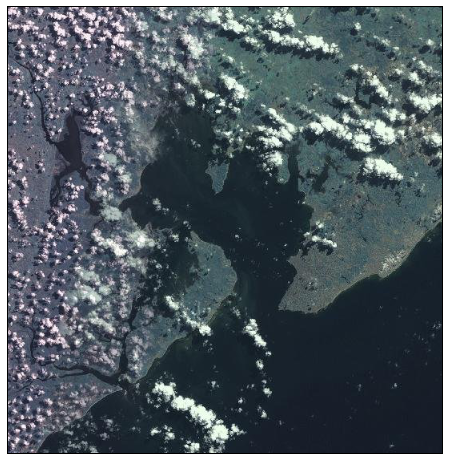

In [8]:
fig, ax = request_map(cimgt.MapQuestOpenAerial(), zoom=10)

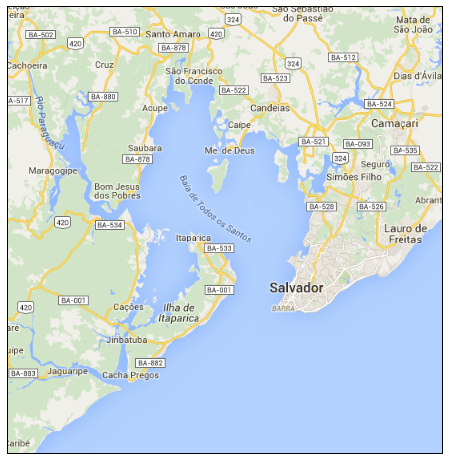

In [9]:
fig, ax = request_map(cimgt.GoogleTiles(), zoom=10)

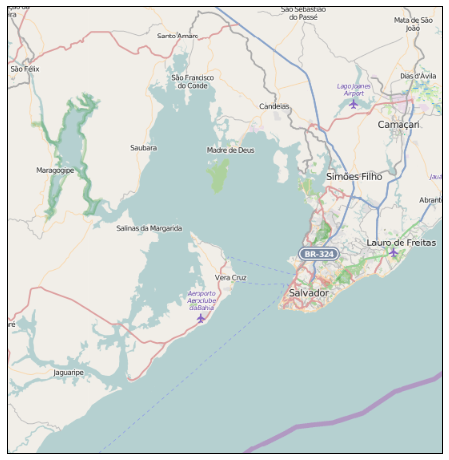

In [10]:
fig, ax = request_map(cimgt.OSM(), zoom=10)

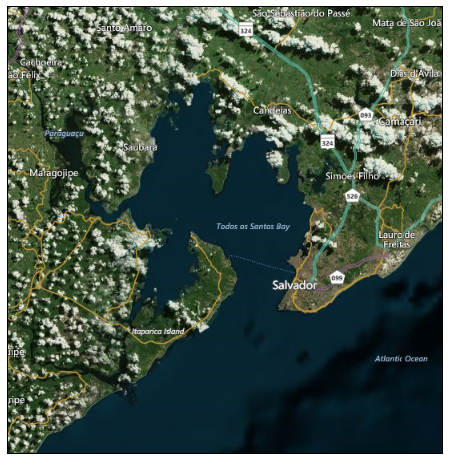

In [11]:
fig, ax = request_map(cimgt.QuadtreeTiles(), zoom=10)

In [ ]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


def brazil_states(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(projection=projection))
    ax.set_extent([-82, -32, -45, 10])
    ax.stock_img()
    ax.add_feature(LAND)
    ax.add_feature(COASTLINE)
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

In [ ]:
fig, ax = brazil_states()
states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                             name='admin_1_states_provinces_shp')
_ = ax.add_feature(states, edgecolor='gray')

## Iris e o objeto `cube`

O objeto de mais alto nível do `iris` é chamado `cube`.
Um cubo contém os dados e informações sobre os dados (*metadata*) sobre de
apenas uma variável.  Isso é uma consequência da interpretação do modelo de
dados da convenção *Climate and Forecast (CF) Metadata Conventions*.

Cada `cube` contém:

 * Um `array` de dados (em geral uma *numpy array*.)
 * Um nome, preferencialmente um CF *standard_name* que descreve a variável que o cubo representa.
 * Uma coleção de coordenadas que descreve as dimensões da *array* de dados.

As coordenadas são divididas em dois típicos:
- Coordenadas com dimensões são numéricas, monotônicas e representam apenas uma dimensão na *array* de dados.  Só pode haver uma coordenada com "dimensionada" por dimensão dos dados.
- Coordenadas auxiliares, que podem ser qualquer tipo, incluindo valores discretos como *strings*, e podem representar mais de uma dimensão nos dados.

Leia mais sobre iris e o cubo [aqui](http://scitools.org.uk/iris/docs/latest/userguide/iris_cubes.html).

![](./files/multi_array_to_cube.png)

In [ ]:
import iris

cubes = iris.load_raw('./data/mdt_cnes_cls2009_global_v1.1.nc')

In [ ]:
print(cubes)

In [ ]:
elev = cubes[6]

print(elev)

In [ ]:
import iris.quickplot as qplt

qplt.pcolormesh(elev)

In [ ]:
elev.data.max()

In [ ]:
import numpy.ma as ma

elev.data = ma.masked_equal(elev.data, elev.data.max())

In [ ]:
fig, ax = plt.subplots(figsize=(13, 13))

cs = qplt.pcolormesh(elev)